### Treść zadania

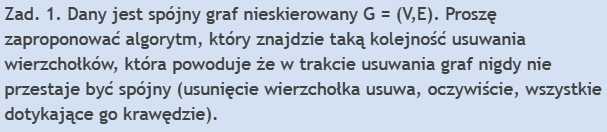

### Omówienie algorytmu

Algorytm polega na tym, że wykorzystujemy zwykłą implementację DFS, w której po przetworzeniu wierzchołka, zapisujemy czas jego przetworzenia i zwiększamy bieżący czas o 1. W ten sposób, kolejno przetwarzane wierzchołki będą miały większe czasy przetworzenia od poprzednich. Za przetworzenie wierzchołka rozumiem moment, w którym zakończy się rekurencyja we wszystkich wierzchołkach, które są połączone z bieżącym wierzchołkiem, a nie były one wcześniej odwiedzone. W wynikowej tablicy znajdować się będą wierzchołki (indeksy, które im odpowiadają), ustawione w takiej kolejności, że każdy kolejny wierzchołek ma zostać usunięty po usunięciu poprzedniego.
###### Dowód poprawności:
Zauważmy, że najpierw przetworzony będzie ostatni wierzchołek na wyznaczonej w danym momencie ścieżce, czyli taki, który jest połączony jedynie z odwiedzonymi już wcześniej wierzchołkami. Wówczas otrzyma on najmniejszy czas przetworzenia, a więc finalnie zostanie wybrany jako pierwszy wierzchołek do usunięcia. Rozumowanie takie jest poprawne, ponieważ z tego wierzchołka nie wychodzi już żadna krawędź do nieodwiedzonego wcześniej wierzchołka, a więc jego usunięcie nie spowoduje, że nie będziemy w stanie dotrzeć do kolejnych wierzchołków grafu (że graf zostanie rozspójniony). Wynika to po prostu z tego, że algorytm DFS znalazł wcześniej ścieżkę, która przechodzi przez pozostałe wierzchołki, więc nawet jeżeli usuniemy obecny wierzchołek (ten, na którym DFS się zatrzymał i musi się cofnąć), nie zablokujemy przez to możliwości dostania się do innych wierzchołków. Zauważmy, że mówimy tu o pierwszym wyznaczonym wierzchołku, ale zależność ta przenosi się w sposób rekurencyjny na pozostały po usunięciu graf, tzn. jeżeli usuniemy ten jeden wierzchołek, to w pozostałym grafie znów będzie wierzchołek, na którym DFS się zatrzyma lub będzie musiał się cofnąć, a to znowu będzie oznaczało, że skoro z danego wierzchołka wszystkie krawędzie prowadziły jedynie do wcześniej odwiedzonych wierzchołków (lub tych, które już zostały wybrane do usunięcia, ale nie odróżniam tego przypadku, ponieważ one już i tak są oznaczone jako odwiedzone), to istnieje ścieżka, którą dotraliśmy do tamtych wierzchołków, przez co obecny wierzchołek można usunąć. Spójrzmy jeszcze na poniższe ilustracje, które przedstawiają ten problem:
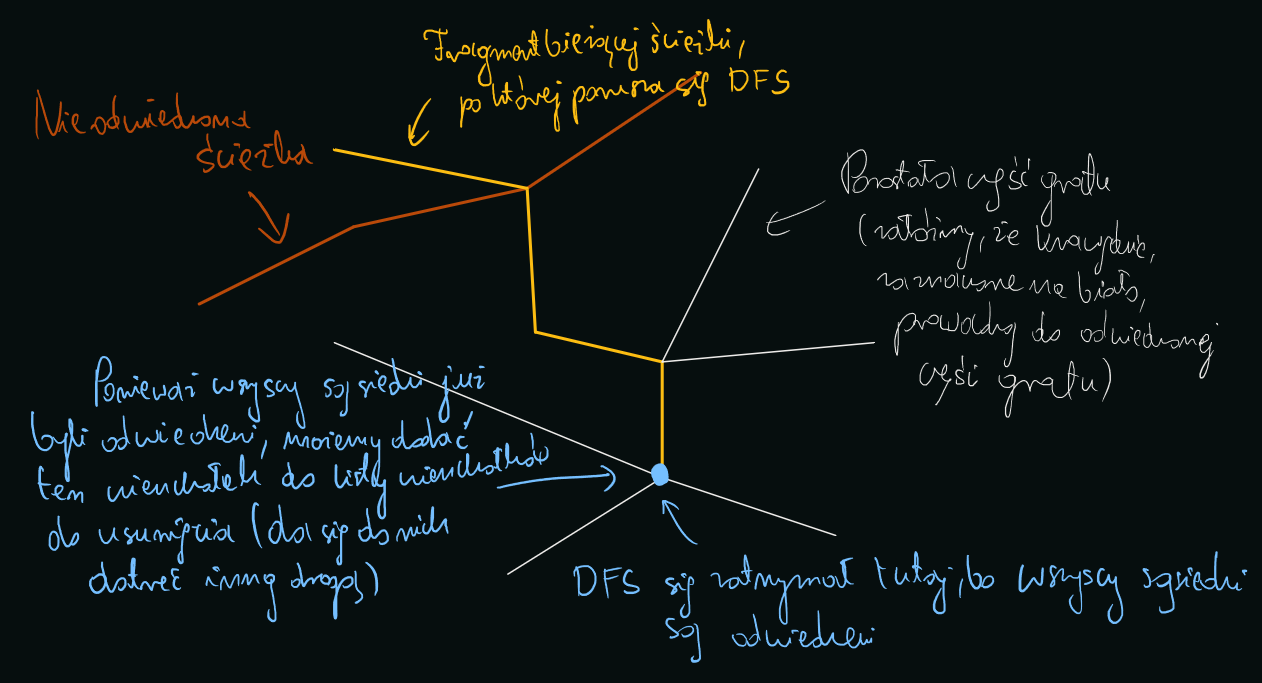
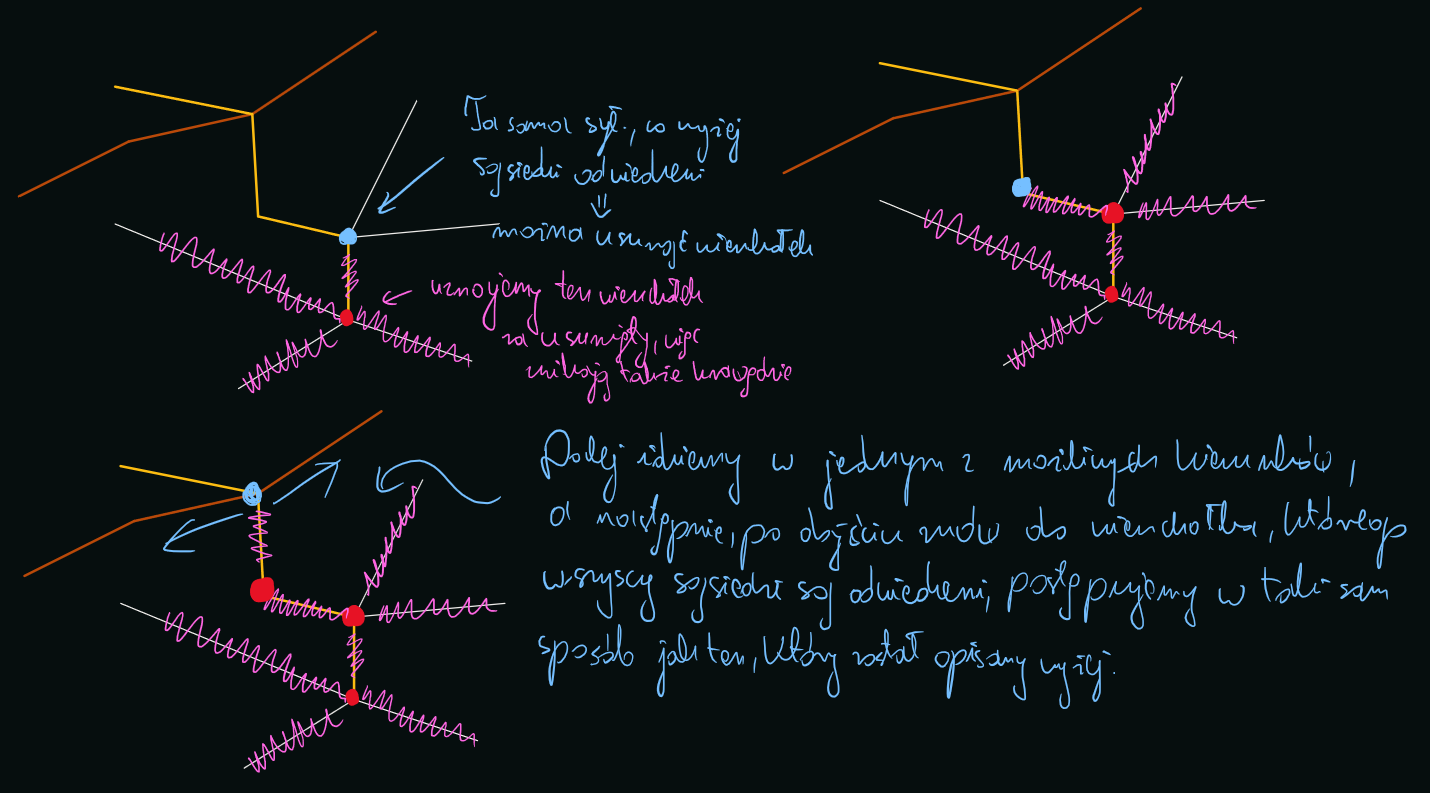
###### UWAGA:
Ponieważ graf ma nie przestawać być spójnym, zakładam, że otrzymany na wejściu graf zawsze jest spójny. Z tego powodu nie sprawdzam już spójności ani nie szukam osobno listy wierzchołków do usunięcia w każdej spójnej składowej.

##### Animacja

Na koniec powinniśmy jeszcze dojśćdo wierzchołka 0, ale się ucięło.
<div>
    <video src="./zad1-anim.mp4" controls style="width: 100%; height: 100%; padding: 0; margin: 0 auto;"></video>
</div>

### Złożoność

Taka sama, jak DFS, czyli odpowiednio:
###### Dla reprezentacji, przy pomocy list sąsiedztwa:
$ O(V + E) $, gdzie $ V $ - liczba wierzchołków, $ E $ - liczba krawędzi,
###### Dla reprezentacji, przy pomocy macierzy:
$ O(V^2) $, gdzie $ V $ - liczba wierzchołków,

### Implementacja #1
#### Dla reprezentacji grafu w postaci list sąsiedztwa

Jeżeli chcemy skorzystać z sortowania (choć nie jest ono konieczne, co przedstawiłem w kolejnych implementacjach), aby nie zepsuć złożoności, konieczne jest wykorzystanie sortowania o złożoności liniowej.

In [1]:
def counting_sort(arr, k: 'the upper bound of the values range', fn=lambda x: x):
    # Allocate memory for required temporary arrays
    counts = [0] * (k + 1)
    temp = [None] * len(arr)
    # Count values repetitions
    for val in arr:
        counts[fn(val)] += 1
    # Modify the counts array to indicate how many values are not greater than the current one
    for i in range(1, len(counts)):
        counts[i] += counts[i-1]
    # Rewrite values to the temp sorted array
    for i in range(len(arr)-1, -1, -1):
        counts[fn(arr[i])] -= 1
        temp[counts[fn(arr[i])]] = arr[i]
    # Rewrite sorted values to the initial array
    for i in range(len(temp)):
        arr[i] = temp[i]
        

def remove_vertices_order(G: 'graph represented using adjacency lists'):
    n = len(G)
    visited = [False] * n
    p_times = [0] * n  # Process time of each vertex
    time = 0
    
    def dfs(u):
        visited[u] = True
        
        for v in G[u]:
            if not visited[v]:
                dfs(v)
        
        nonlocal time
        time += 1
        p_times[u] = time
    
    for u in range(n):
        if not visited[u]:
            dfs(u)
            
    # Return array of vertices sorted by their processing time in an increasing order
    # (This will be an array of vertices ordered in such a way which guarantees that
    # removing subsequent vertices from this array won't lead to decomposition of the 
    # graph)
    vert = list(range(n))
    counting_sort(vert, n, fn=lambda u: p_times[u])
    return vert
        
    
def undirected_graph_list(E: 'array of edges', n: 'number of vertices'):
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
        G[edge[1]].append(edge[0])
    return G

###### Kilka testów

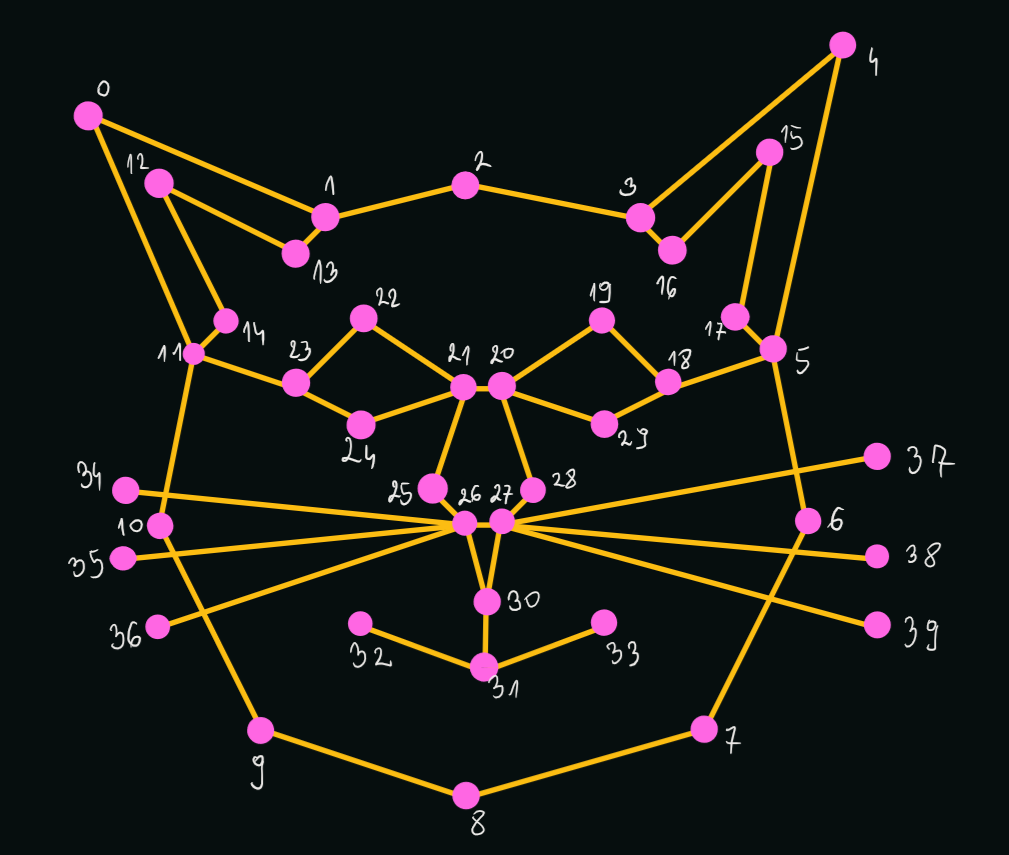

In [2]:
E = [*((i, i+1) for i in range(11)), (11, 0), (11, 14), (14, 12), (12, 13), (13, 1), (3, 16), (16, 15),
     (15, 17), (17, 5), (11, 23), (23, 22), (22, 21), (21, 24), (24, 23), (21, 20), (20, 19), (19, 18),
     (18, 29), (29, 20), (18, 5), (21, 25), (25, 26), (26, 27), (27, 28), (28, 20), (26, 30), (30, 27),
     (30, 31), (31, 32), (31, 33), (34, 26), (35, 26), (36, 26), (27, 37), (27, 38), (27, 39)]
n = len(set(v for edge in E for v in edge))

G = undirected_graph_list(E, n)
print(*G, sep='\n')
print(remove_vertices_order(G))

[1, 11]
[0, 2, 13]
[1, 3]
[2, 4, 16]
[3, 5]
[4, 6, 17, 18]
[5, 7]
[6, 8]
[7, 9]
[8, 10]
[9, 11]
[10, 0, 14, 23]
[14, 13]
[12, 1]
[11, 12]
[16, 17]
[3, 15]
[15, 5]
[19, 29, 5]
[20, 18]
[21, 19, 29, 28]
[22, 24, 20, 25]
[23, 21]
[11, 22, 24]
[21, 23]
[21, 26]
[25, 27, 30, 34, 35, 36]
[26, 28, 30, 37, 38, 39]
[27, 20]
[18, 20]
[26, 27, 31]
[30, 32, 33]
[31]
[31]
[26]
[26]
[26]
[27]
[27]
[27]
[13, 12, 14, 24, 29, 18, 19, 25, 32, 33, 31, 30, 34, 35, 36, 26, 37, 38, 39, 27, 28, 20, 21, 22, 23, 11, 10, 9, 8, 7, 6, 16, 15, 17, 5, 4, 3, 2, 1, 0]


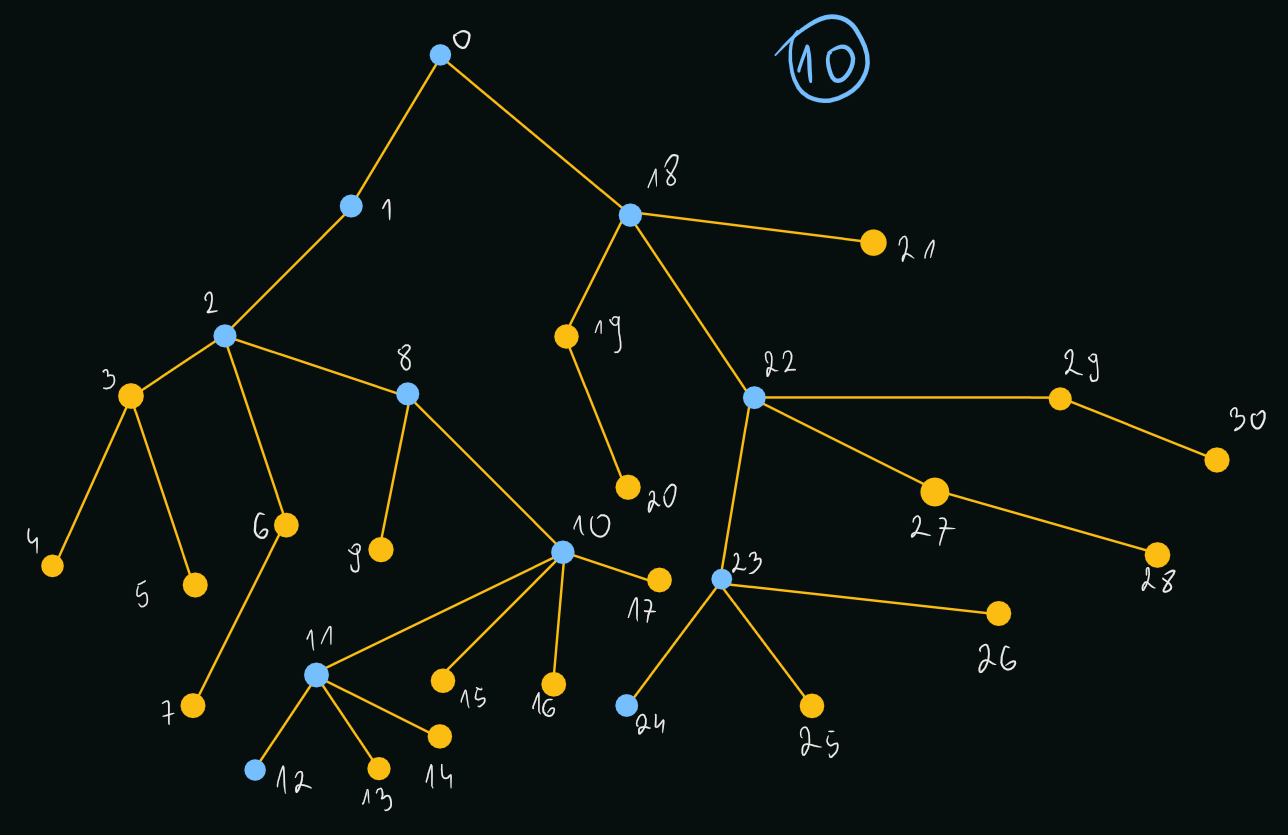

In [3]:
E = [(0, 1), (1, 2), (2, 3), (3, 4), (3, 5), (2, 6), (6, 7), (2, 8), (8, 9), (8, 10), (10, 17),
     (10, 16), (10, 15), (10, 11), (11, 12), (11, 13), (11, 14), (0, 18), (18, 21), (18, 19),
     (19, 20), (18, 22), (22, 23), (23, 24), (23, 25), (23, 26), (28, 27), (22, 27), (22, 29), (29, 30)]

n = len(set(v for edge in E for v in edge))

G = undirected_graph_list(E, n)
print(*G, sep='\n')
print('Remove:', remove_vertices_order(G))

[1, 18]
[0, 2]
[1, 3, 6, 8]
[2, 4, 5]
[3]
[3]
[2, 7]
[6]
[2, 9, 10]
[8]
[8, 17, 16, 15, 11]
[10, 12, 13, 14]
[11]
[11]
[11]
[10]
[10]
[10]
[0, 21, 19, 22]
[18, 20]
[19]
[18]
[18, 23, 27, 29]
[22, 24, 25, 26]
[23]
[23]
[23]
[28, 22]
[27]
[22, 30]
[29]
Remove: [4, 5, 3, 7, 6, 9, 17, 16, 15, 12, 13, 14, 11, 10, 8, 2, 1, 21, 20, 19, 24, 25, 26, 23, 28, 27, 30, 29, 22, 18, 0]


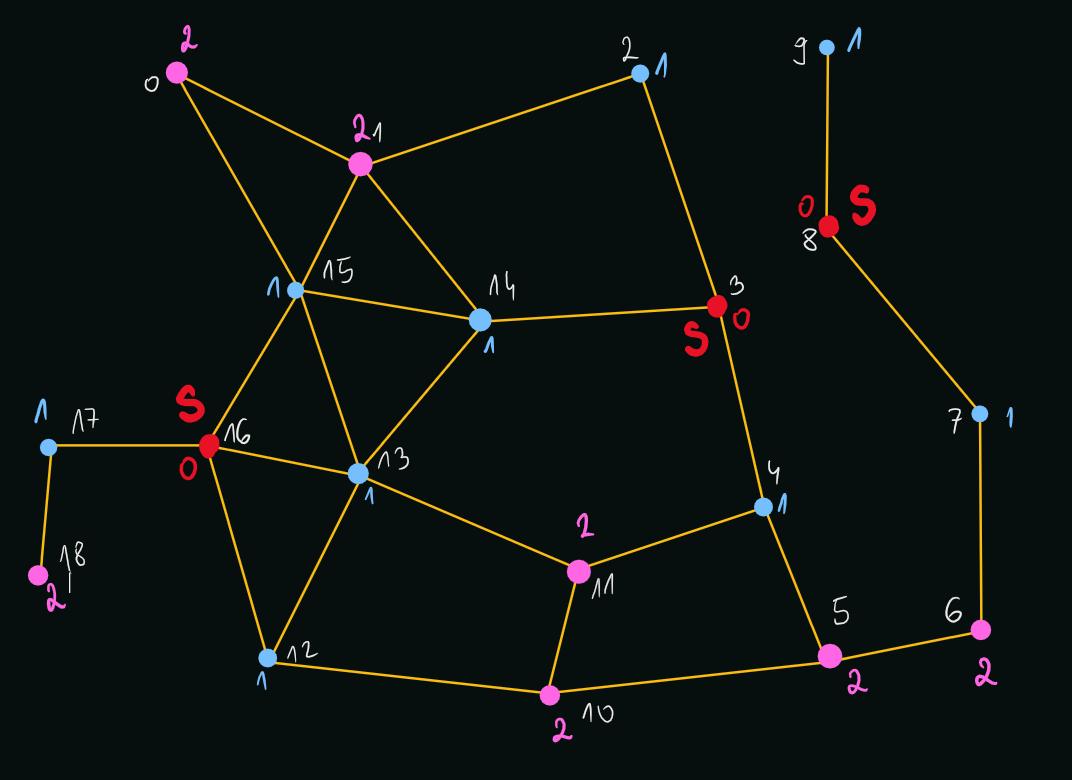

In [4]:
E = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (0, 15), (1, 15),
     (1, 14), (15, 14), (14, 3), (15, 13), (13, 14), (16, 15), (16, 13), (18, 17), (17, 16),
     (16, 12), (12, 13), (13, 11), (11, 10), (12, 10), (10, 5), (11, 4)]

n = len(set(v for edge in E for v in edge))

G = undirected_graph_list(E, n)
print(*G, sep='\n')
print('Remove:', remove_vertices_order(G))

[1, 15]
[0, 2, 15, 14]
[1, 3]
[2, 4, 14]
[3, 5, 11]
[4, 6, 10]
[5, 7]
[6, 8]
[7, 9]
[8]
[11, 12, 5]
[13, 10, 4]
[16, 13, 10]
[15, 14, 16, 12, 11]
[1, 15, 3, 13]
[0, 1, 14, 13, 16]
[15, 13, 17, 12]
[18, 16]
[17]
Remove: [9, 8, 7, 6, 14, 18, 17, 12, 16, 15, 13, 11, 10, 5, 4, 3, 2, 1, 0]


### Implementacja #1.1 (Ulepszona)
#### Dla reprezentacji grafu w postaci list sąsiedztwa
##### (Bez sortowania - od razu zapisujemy rezulat)

In [5]:
def remove_vertices_order(G: 'graph represented using adjacency lists'):
    n = len(G)
    visited = [False] * n
    result = [-1] * n
    time = 0
    
    def dfs(u):
        visited[u] = True
        
        for v in G[u]:
            if not visited[v]:
                dfs(v)
        
        nonlocal time
        result[time] = u
        time += 1
    
    for u in range(n):
        if not visited[u]:
            dfs(u)

    return result
        
    
def undirected_graph_list(E: 'array of edges', n: 'number of vertices'):
    G = [[] for _ in range(n)]
    for edge in E:
        G[edge[0]].append(edge[1])
        G[edge[1]].append(edge[0])
    return G

###### Kilka testów

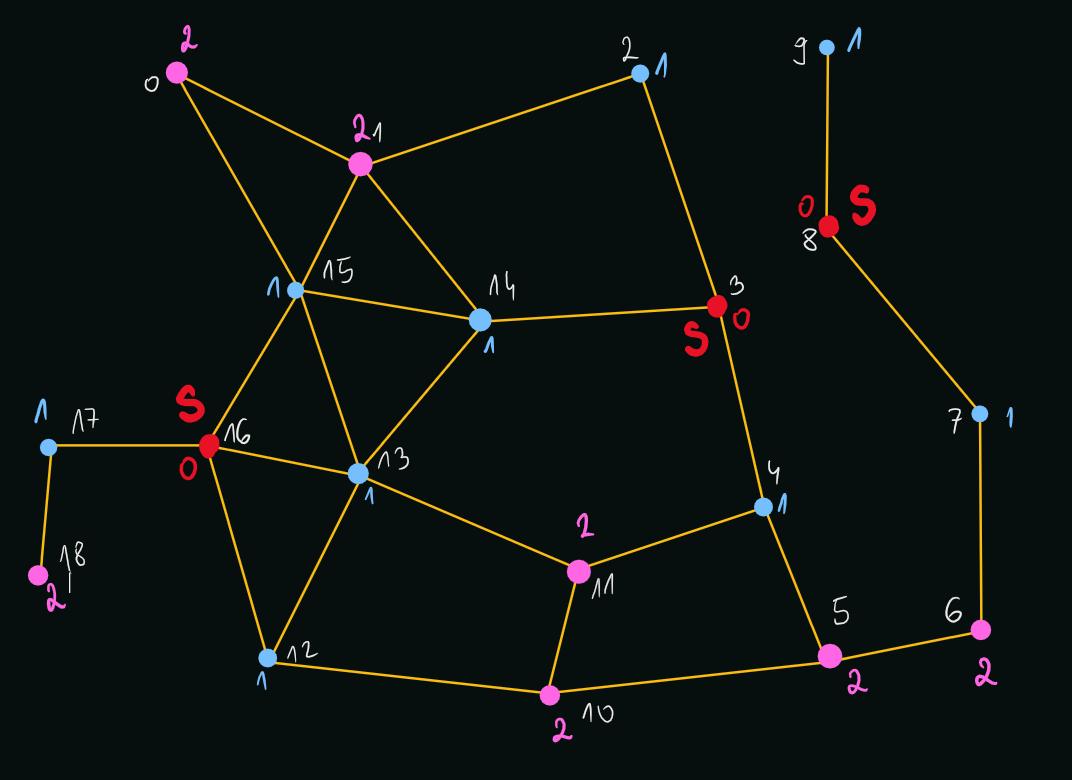

In [6]:
E = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (0, 15), (1, 15),
     (1, 14), (15, 14), (14, 3), (15, 13), (13, 14), (16, 15), (16, 13), (18, 17), (17, 16),
     (16, 12), (12, 13), (13, 11), (11, 10), (12, 10), (10, 5), (11, 4)]

n = len(set(v for edge in E for v in edge))

G = undirected_graph_list(E, n)
print(*G, sep='\n')
print('Remove:', remove_vertices_order(G))

[1, 15]
[0, 2, 15, 14]
[1, 3]
[2, 4, 14]
[3, 5, 11]
[4, 6, 10]
[5, 7]
[6, 8]
[7, 9]
[8]
[11, 12, 5]
[13, 10, 4]
[16, 13, 10]
[15, 14, 16, 12, 11]
[1, 15, 3, 13]
[0, 1, 14, 13, 16]
[15, 13, 17, 12]
[18, 16]
[17]
Remove: [9, 8, 7, 6, 14, 18, 17, 12, 16, 15, 13, 11, 10, 5, 4, 3, 2, 1, 0]


### Implementacja #2
#### Dla reprezentacji grafu w postaci macierzy sąsiedztwa

In [7]:
def remove_vertices_order(G: 'graph represented using adjacency matrix'):
    n = len(G)
    visited = [False] * n
    result = [-1] * n
    time = 0
    
    def dfs(i):
        visited[i] = True
        
        for j in range(n):
            if G[i][j] and not visited[j]:
                dfs(j)
        
        nonlocal time
        result[time] = i
        time += 1
    
    for i in range(n):
        if not visited[i]:
            dfs(i)

    return result


def undirected_graph_matrix(E: 'array of edges', n: 'number of vertices'):
    M = [[0] * n for _ in range(n)]
    # Store information which vertices are connected with an edge
    for edge in E:
        M[edge[0]][edge[1]] = M[edge[1]][edge[0]] = 1
    return M

###### Kilka testów

In [8]:
E = [*((i, i+1) for i in range(11)), (11, 0), (11, 14), (14, 12), (12, 13), (13, 1), (3, 16), (16, 15),
     (15, 17), (17, 5), (11, 23), (23, 22), (22, 21), (21, 24), (24, 23), (21, 20), (20, 19), (19, 18),
     (18, 29), (29, 20), (18, 5), (21, 25), (25, 26), (26, 27), (27, 28), (28, 20), (26, 30), (30, 27),
     (30, 31), (31, 32), (31, 33), (34, 26), (35, 26), (36, 26), (27, 37), (27, 38), (27, 39)]
n = len(set(v for edge in E for v in edge))

G = undirected_graph_matrix(E, n)
print(*G, sep='\n')
print(remove_vertices_order(G))

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0